In [2]:
# magics: ensures that any changes to the modules loaded below will be re-loaded automatically
%load_ext autoreload
%autoreload 2

# load general packages
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

# load modules related to this exercise
import tools 
from model_exante import model_bufferstock

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Exercise 3 Solving the buffer-stock consumption model with EGM

Consider the canonical buffer-stock consumption model. The exercise will be to add code to model.py such that we can produce life-cycle figures from the Buffer Stock model.

Bellman equation in ratio form: 

$$\begin{align*}
v_{t}(m_{t}) & = & \max_{c_{t}}\left\{ \frac{c_{t}^{1-\rho}}{1-\rho}+\beta\mathbb{E}_{t}\left[(G L_{t+1} \psi_{t+1})^{1-\rho}v_{t+1}(m_{t+1})\right]\right\} \\
 & \text{s.t.}\\
 a_t & = & m_t-c_t \\
m_{t+1} & = & \frac{1}{G L_t \psi_{t+1}}Ra_t+\xi_{t+1}\\ 
\xi_{t+1}& = & \begin{cases}
\mu  &\text{with prob. }\pi\\
(\epsilon_{t+1}-\pi \mu)/ (1-\pi) &\text{else}
\end{cases}\\ \\
a_t &\geq& \lambda_t =  \begin{cases} 
-\lambda & if t < T_R\\
0 & if t \geq T_R
\end{cases} \\
\psi_{t} & \sim & \exp \mathcal{N}(-0.5 \sigma^2_{\psi},\sigma^2_{\psi})\\
\epsilon_{t} & \sim & \exp \mathcal{N}(-0.5 \sigma^2_{\xi},\sigma^2_{\xi}) \\
\end{align*}$$

and remember:
$$\begin{align*}
Y_{t+1}& = & \psi_{t+1} P_{t+1} \\
P_{t+1}& = & GL_tP_t\psi_{t+1}\\ 
c_t & \equiv & C_t/P_t \\
m_t & \equiv & M_t/P_t \\
a_t & \equiv & A_t/P_t \\
p_t & \equiv & \ln(P_t) \\
y_t & \equiv & \ln(Y_t) \\
\end{align*}$$



#### 1. Look at ReadMe.txt to get an overview of the ex ante code

#### 2. Ensure you understand the following functions:
<il type ="a">
<li> model.setup </li>
<li> model.create_grids </li>
<li> model.solve</li>
</il>

Hint: Look at how they are called from 03_buffer_stock_egm.

#### 3. Fill in the missing stuff in the function model.EGM

In [3]:
#Load baseline settings

model = model_bufferstock()


In [4]:
model.setup()

par = model.par

# Life-cycle settings
par.T = 90-par.age_min
par.Tr = 65-par.age_min
par.simT = par.T
par.simlifecycle = 1

# Income profile
par.L[0:par.Tr] = np.linspace(1,1/par.G,par.Tr)
par.L[par.Tr-1] = 0.9
par.L[par.Tr-1:] = par.L[par.Tr-1:]/par.G  

#Solve and simulate
model.create_grids()
model.solve()
model.simulate()

sol = model.sol
sim = model.sim

In [11]:
#par.L.shape
#par.L*par.G
par.L[0:par.Tr] = np.linspace(1,1/par.G,par.Tr)
len(par.L)

200

#### 4. Run 03_buffer_stock_egm and check that your results are correct

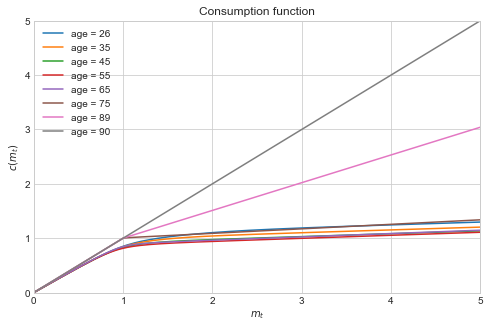

In [6]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1)
for age in [26, 35, 45, 55, 65, 75, par.T+par.age_min-1,par.T+par.age_min] :
    ax.plot(sol.m[age-par.age_min-1,:],sol.c[age-par.age_min-1,:], label=f'age = {age}')
ax.set_xlabel(f"$m_t$")
ax.set_ylabel(f"$c(m_t)$")
ax.set_xlim([np.min(par.a_min), 5])
ax.set_ylim([0,5])
ax.set_title(f'Consumption function')
plt.legend()
plt.show()

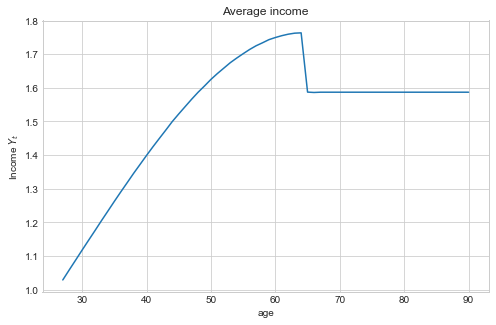

In [7]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1)
ax.plot(np.arange(par.simT)+par.age_min+1,np.mean(sim.Y,1))
ax.set_xlabel(f"age")
ax.set_ylabel(f"Income $Y_t$")
ax.set_title(f'Average income')
plt.show()

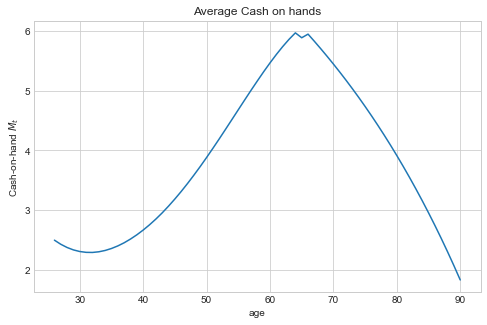

In [8]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1)
ax.plot(np.arange(par.simT)+par.age_min+1,np.mean(sim.M,1))
ax.set_xlabel(f"age")
ax.set_ylabel(f"Cash-on-hand $M_t$")
ax.set_title(f'Average Cash on hands')
plt.show()

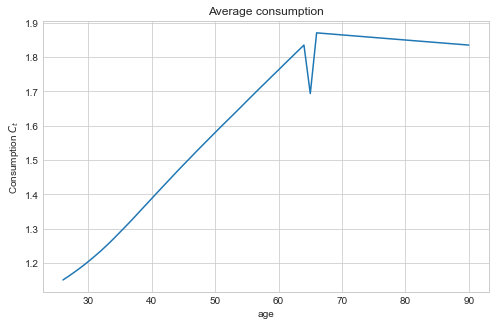

In [9]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1)
ax.plot(np.arange(par.simT)+par.age_min+1,np.mean(sim.C,1))
ax.set_xlabel(f"age")
ax.set_ylabel(f"Consumption $C_t$")
ax.set_title(f'Average consumption')
plt.show()

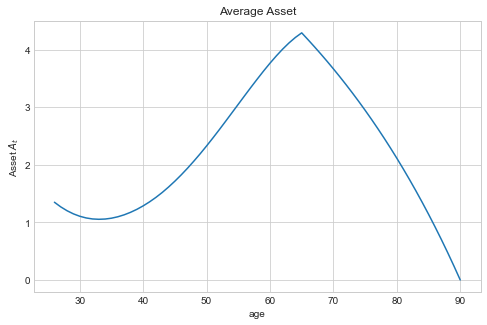

In [9]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1)
ax.plot(np.arange(par.simT)+par.age_min+1,np.mean(sim.A,1))
ax.set_xlabel(f"age")
ax.set_ylabel(f"Asset $A_t$")
ax.set_title(f'Average Asset')
plt.show()

#### 5. (Optional) Could you write a vectorized version of EGM to speed it up? (i.e. without no loop over $a_t$)

In [ ]:
#Load baseline settings
model_vec = model_bufferstock()
model_vec.setup()

par = model_vec.par

# Life-cycle settings
par.T = 90-par.age_min
par.Tr = 65-par.age_min
par.simT = par.T
par.simlifecycle = 1

# Income profile
par.L[0:par.Tr] = np.linspace(1,1/par.G,par.Tr)
par.L[par.Tr-1] = 0.9
par.L[par.Tr-1:] = par.L[par.Tr-1:]/par.G  

#Solve and simulate
model.create_grids()
model.solve()
model.simulate()